In [1]:
#IMPORTS BÁSICOS
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt


#LINKS ARCHIVOS
URL_friends = ('/content/Friends.csv')
URL_friends_emotions = ('/content/Friends_emotions_merged.csv')

#OTRAS CREACIONES
df_friends = pd.read_csv (URL_friends)
df_friends_emo = pd.read_csv (URL_friends_emotions)
main_characters = ['Chandler Bing', 'Rachel Green','Joey Tribbiani','Ross Geller','Monica Geller','Phoebe Buffay']
emotion_classified = {
    'Joyful':'Positiva',
    'Peaceful':'Positiva',
    'Powerful':'Positiva',
    'Sad':'Negativa',
    'Scared':'Negativa',
    'Mad':'Negativa',
    'Neutral':'Neutral',
    }

#   **FRIENDS, EL SITCOM LEGENDARIO**

<p align="justify"> "Friends" es una icónica serie de televisión estadounidense que se emitió desde 1994 hasta 2004, pero que continúa siendo amada por audiencias de todo el mundo. Creada por David Crane y Marta Kauffman, la serie se desarrolla en Nueva York y sigue las vidas, amores y aventuras de un grupo de seis amigos: Rachel, Ross, Monica, Chandler, Joey y Phoebe. La serie se destaca por su humor inteligente, personajes entrañables y situaciones cómicas, lo que la convirtió en un fenómeno cultural.


In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("Xs-HbHCcK58?si=CNAwxtjeEjQ6axZ7")

Aunque entre los fans suele haber un acuerdo general respecto a la importancia de todos los personajes principales, hay uno que suele dar la sensación de lucir por encima del resto y ese es nuestro querido **Chandler**.

<p align="justify">Este notebook intentará comprobar si efectivamente la participación de este personaje, su rol dentro de la serie y su participación.

##   **¿CUÁL ES EL TONO DE LA SERIE?**

Empecemos por un análisis general. Friends es conocida por ser una sitcom, o en otras palabras, una comedia de situación. Pero aparte de momentos cómicos, también transmite otro tipo de emociones. ¿Hasta que punto las transmite y de qué tipo?

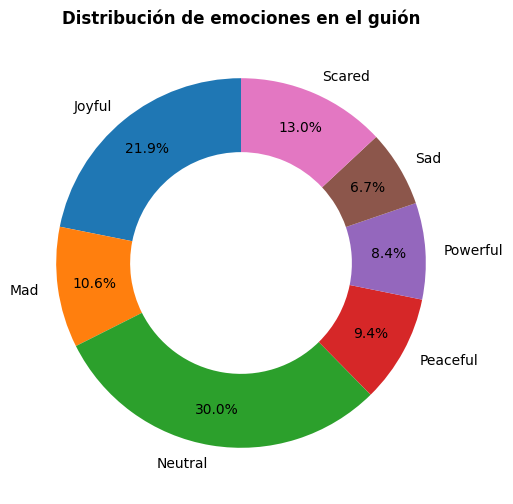

In [3]:
total_emotions = df_friends_emo.groupby('Emotion')['Emotion'].count()

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(total_emotions, labels=total_emotions.index, autopct='%1.1f%%', startangle=90, pctdistance=0.80,textprops={'color': 'black'}, wedgeprops=dict(width=0.4))
ax.set_title("Distribución de emociones en el guión",weight = "bold")

plt.show()

Como es posible ver, Friends comprende un gran abanico de emociones pero ¿son los momentos divertidos o alegres superiores a los negativos?

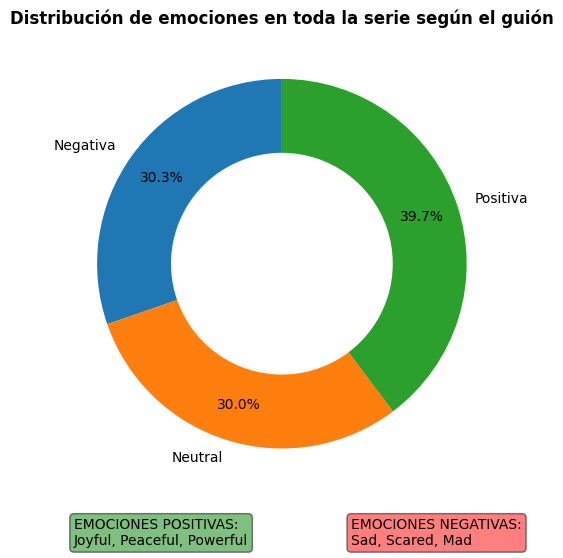

In [4]:
df_filtered = df_friends_emo[df_friends_emo['Emotion'].notna() & df_friends_emo['Emotion'].ne('')].copy()
df_filtered.loc[:, 'Category'] = df_filtered['Emotion'].map(emotion_classified)
df_filtered = df_filtered.dropna(subset=['Category'])
category_counts = df_filtered.groupby('Category')['Category'].count()

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.80, textprops={'color': 'black'}, wedgeprops=dict(width=0.4))
ax.set_title("Distribución de emociones en toda la serie según el guión", weight="bold")

positive_emotions = [emotion for emotion, category in emotion_classified.items() if category == "Positiva"]
text_box_content_positive = "EMOCIONES POSITIVAS:\n" + ", ".join(positive_emotions)
ax.text(0.05, -0.05, text_box_content_positive, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))

negative_emotions = [emotion for emotion, category in emotion_classified.items() if category == "Negativa"]
text_box_content_negative = "EMOCIONES NEGATIVAS:\n" + ", ".join(negative_emotions)
ax.text(0.65, -0.05, text_box_content_negative, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))

plt.show()

Friends tiene casi hasta un 10% más de escenas con emociones positivas asociadas

##   **¿CÓMO SE APLICA ESE TONO A LOS PERSONAJES?**

Ahora que sabemos cúal es el tono de la serie, ¿se distribuye de forma ecuánime entre los personajes princiaples? ¿Hay alguno que tenga una predisposición especial a un rol en concreto? ¿Alguno que transmita más emociones negativas que positivas?

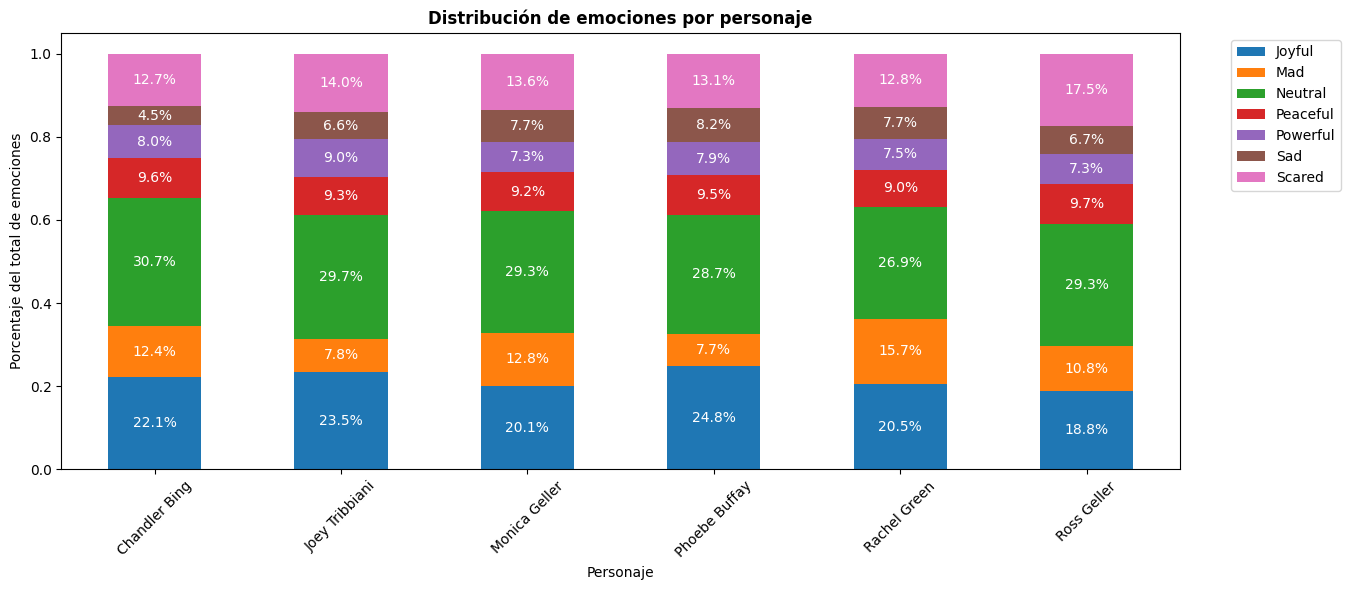

In [5]:
df_main_characters = df_friends_emo[df_friends_emo['Speaker'].isin(main_characters)]

pivot_df = df_main_characters.pivot_table(index='Emotion', columns='Speaker', aggfunc='size', fill_value=0)
pivot_normalized = pivot_df.div(pivot_df.sum())

ax = pivot_normalized.T.plot(kind='bar', stacked=True, figsize=(12, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(height),
            horizontalalignment='center',
            color='white',
            verticalalignment='center')

plt.title('Distribución de emociones por personaje', weight = 'bold')
plt.ylabel('Porcentaje del total de emociones')
plt.xlabel('Personaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))

plt.show()

El persona que más momentos "Joyful" tiene es Phoebe. Este dato resalta con su % de momentos tristes, el más elevado de la comparativa, lo que nos podría sugerir un personaje con capacidad de abarcar ambas emociones extremas con cierta facilidad.

En cuanto a **Chandler**, destaca el hecho de que sea el personaje con mayor número de escenas con el atributo "Peaceful" y "Neutral". Esto podría encajarse con el perfil de personaje tranquilo y ácido en humor. En general, parece uno de los personajes más equilibrados en cuanto a emociones.

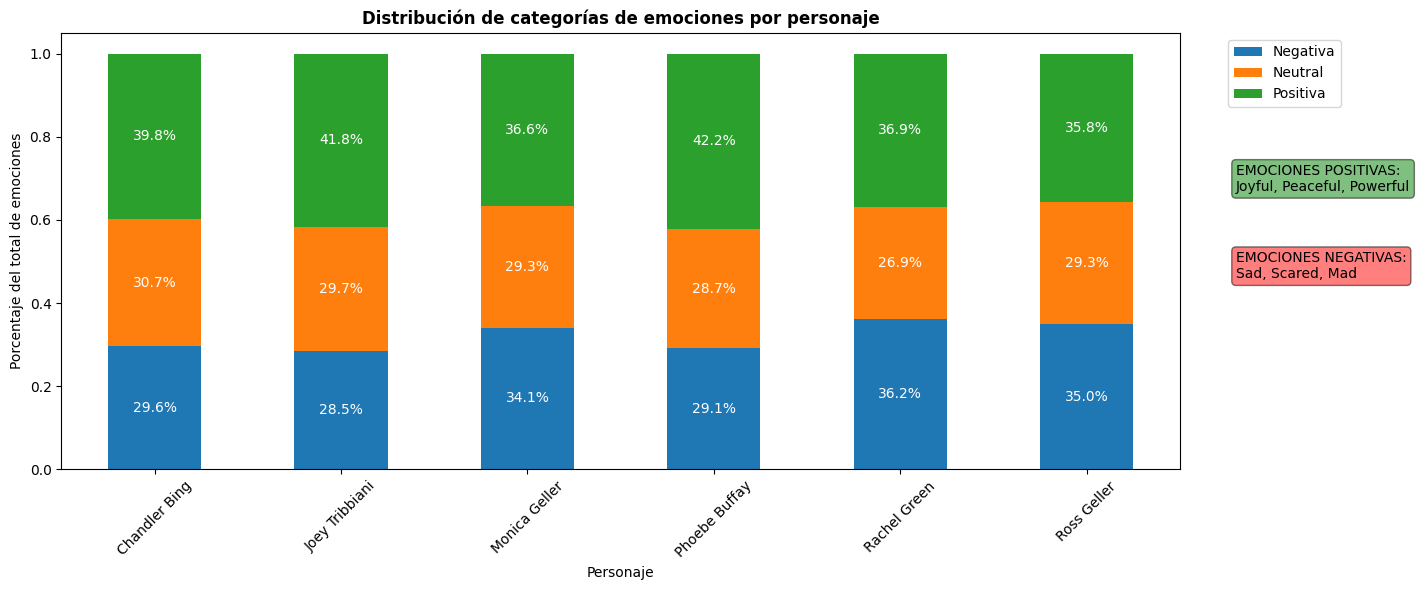

In [6]:
df_filtered = df_friends_emo[df_friends_emo['Emotion'].notna() & df_friends_emo['Emotion'].ne('')].copy()
df_filtered['Category'] = df_filtered['Emotion'].map(emotion_classified)

df_main_characters = df_filtered[df_filtered['Speaker'].isin(main_characters)]

pivot_df = df_main_characters.pivot_table(index='Category', columns='Speaker', aggfunc='size', fill_value=0)
pivot_normalized = pivot_df.div(pivot_df.sum())

ax = pivot_normalized.T.plot(kind='bar', stacked=True, figsize=(12, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(height),
            horizontalalignment='center',
            color='white',
            verticalalignment='center')

plt.title('Distribución de categorías de emociones por personaje', weight ='bold')
plt.ylabel('Porcentaje del total de emociones')
plt.xlabel('Personaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))

positive_emotions = [emotion for emotion, category in emotion_classified.items() if category == "Positiva"]
text_box_content_positive = "EMOCIONES POSITIVAS:\n" + ", ".join(positive_emotions)
ax.text(1.05, 0.7, text_box_content_positive, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='green', alpha=0.5))

negative_emotions = [emotion for emotion, category in emotion_classified.items() if category == "Negativa"]
text_box_content_negative = "EMOCIONES NEGATIVAS:\n" + ", ".join(negative_emotions)
ax.text(1.05, 0.5, text_box_content_negative, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))

plt.show()

Es interesante ver **Chandler**, es solo el 3º que más escenas con emociones positivas tiene, lo que refuerza la idea de ser un personaje más equilibrado de lo que aparenta.

Por otra parte, Rachel y Ross son los que más escenas con emociones negativas tienen, quizás por fruto del arco argumental de su relación.

##   **¿CUANTA PARTICIPACIÓN HA TENIDO CADA PROTAGONISTA?**

Hasta ahora hemos visto el arquetipo de cada personaje en relación a las emociones que debía de transmitir, pero... ¿cuanto participan de forma activa en la serie?

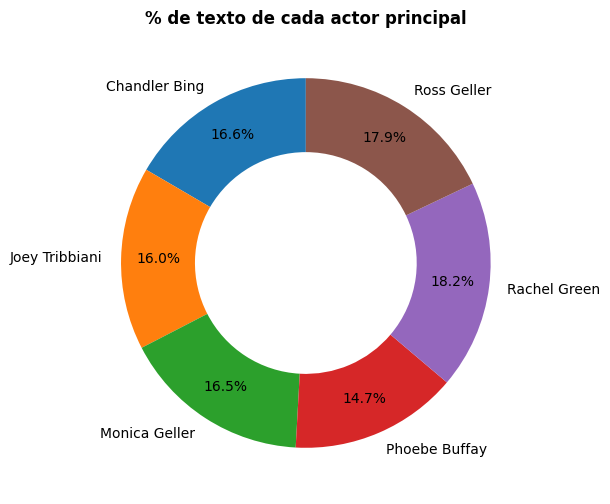

In [7]:
total_text_per_character = df_friends[df_friends['speaker'].isin(main_characters)].groupby('speaker')['text'].count()

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(total_text_per_character, labels=total_text_per_character.index, autopct='%1.1f%%', startangle=90, pctdistance=0.80,textprops={'color': 'black'}, wedgeprops=dict(width=0.4))
ax.set_title("% de texto de cada actor principal",weight = "bold")

plt.show()

Sabiendo que efectivamente, Friends cuenta con muchos momentos positivos, un aspecto relevante para determinar la importancia de los personajes en la serie, es la cantidad de texto de la que disponen cada uno.

A lo largo de las 10 temporadas, podemos ver que, en terminos generales, no parece haber diferencias significativas en cuanto al número de textos asignados a cada protagonista. La única ligera diferencia la encontramos en Phoebe Buffay. Quizás este dato podría ser explicado por el hecho de ser el único personaje principal que no comparte piso con el resto de protagonistas de forma recurrente junto con Ross, aunque en este último caso, al ser el hermano de Mónica, su aparición en escena parece algo más orgánica y fácil de justificar que la de Phoebe, las cuales podrían requerir una argumentación más elaborada.

Para el caso de **Chandler**, es el tercer personaje que más diálogo tiene, soportando claramente al arco entre Ross y Rachel.

##   **¿CÓMO HA EVOLUCIONADO LA CANTIDAD DE TEXTO PARA CADA PERSONAJE?**

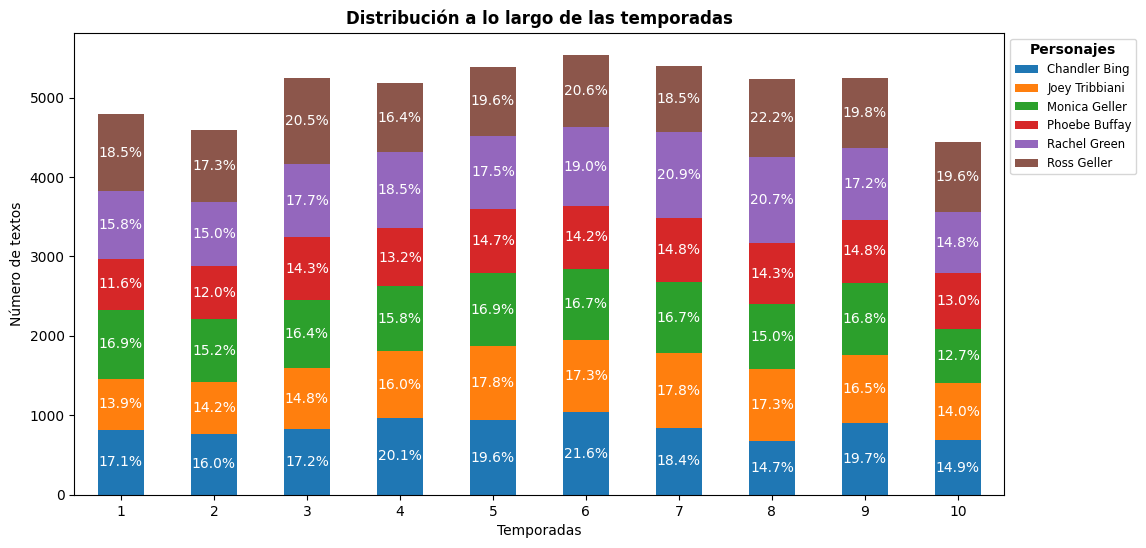

In [8]:
text_grouped_per_character = df_friends[df_friends['speaker'].isin(main_characters)].groupby(['season', 'speaker'])['text'].count().unstack()
ax = text_grouped_per_character.plot(kind='bar', stacked=True, figsize=(12, 6))
total_text_per_character_per_season = text_grouped_per_character.sum(axis=1)

character_count = 0
season_index = 0

for rect in ax.patches:
    height = rect.get_height()
    x = rect.get_x()
    y = rect.get_y()
    width = rect.get_width()

    current_season = total_text_per_character_per_season.index[season_index]
    percentage = (height / total_text_per_character_per_season.loc[current_season]) * 100

    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, f"{percentage:.1f}%", ha='center', va='center', color='white', fontsize=10)
    ax.set_title("Distribución a lo largo de las temporadas",weight = "bold")
    ax.set_ylabel("Número de textos")
    ax.set_xlabel("Temporadas")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    legend = ax.legend(title="Personajes", loc="upper left", fontsize='small', bbox_to_anchor=(1, 1))
    legend_title = legend.get_title()
    legend_title.set_weight('bold')

    character_count += 1
    if character_count == len(main_characters):
        character_count = 0
        season_index += 1

plt.show()

Para el caso en particular de **Chandler**, es posible ver que desde la temporada 4 hasta la temporada 6, sufre un aumento considerable en cuanto a la proporción de texto que habitualmente solía tener.

Esto podría ser explicado por la introducción de la relación de Chandler y Mónica en el arco argumental, introducida por primera vez en la temporada 4 y culminando en la temporada 6 con la pedida.

*Fuente - Evolución relación Mónica/Chandler:* [Click aquí:](https://www.bustle.com/articles/92599-this-friends-timeline-of-monica-chandlers-relationship-proves-they-were-meant-to-be-since-thanksgiving#:~:text=Season%204%2C%20Episode%2024%3A%20",just%20couldn't%20help%20themselves.)

##   **CONCLUSIÓN**

Tras haber analizado las cantidades de texto y las emociones de cada personaje, podemos confirmar que, a diferencia de las sensaciones que se puedan tener, el personaje de **Chandler** ***no es sólo un alivio cómico, sino que es uno de los personajes más equilibrados de la serie tanto en partipación como en emociones desarrolladas en escena***.